In [118]:
import pandas as pd
import seaborn as sn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load csv file into memory

In [104]:
data=pd.read_csv('E:\python_projects\Springboard\datasets\\uber-raw-data-apr14.txt')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [106]:
len(data)

564516

In [107]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [108]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


**Converting a single date as  string into a timestamp**

In [109]:
dt='4/1/2014 0:11:00'
type(dt)

str

In [110]:
dt_date=pd.to_datetime(dt)
dt_date.day

1

**Converting the whole column into a timestamp**

In [111]:
%%timeit
data['Date/Time']=data['Date/Time'].map(pd.to_datetime)

4.25 s ± 50.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


**Alternate way of reading in timestamp field**
read as a date field when reading from the csv

In [113]:
%%timeit
data_dt=pd.read_csv('E:\python_projects\Springboard\datasets\\uber-raw-data-apr14.txt',parse_dates=['Date/Time'])

7.21 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [114]:
data_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


**Adding new fields for day,weekday and hour from the datetime field using lambda and map**

In [115]:
   
data['Day']=data['Date/Time'].map(lambda dt: dt.day)
data['Weekday']=data['Date/Time'].map(lambda dt:dt.weekday())
data['Hour']=data['Date/Time'].map(lambda dt: dt.hour)

In [116]:
data.tail()
data['Day'].max()

30

### Creating a histogram

Text(0.5, 1.0, 'Number of Trips by Day of Month- Uber 2014')

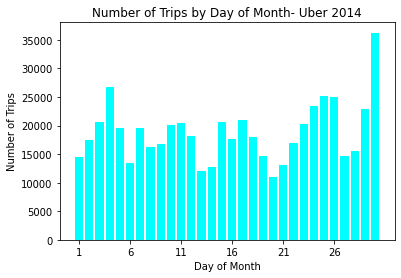

In [124]:
hist(data['Day'],bins=30,rwidth=0.8,range=(0.5,30.5),color='cyan')
xticks(range(1,31,5))
xlabel('Day of Month')
ylabel('Number of Trips')
title('Number of Trips by Day of Month- Uber 2014')

In [126]:
#for i,data in data.groupby('Day'):
#    print(i,data.index)
data_group_day=data.groupby('Day').apply(lambda x: len(x))


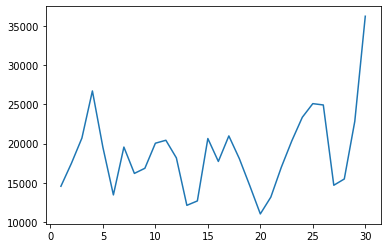

In [129]:
plot(data_group_day)

Text(0.5, 1.0, 'Number of Trips by Day of Month- Uber 2014')

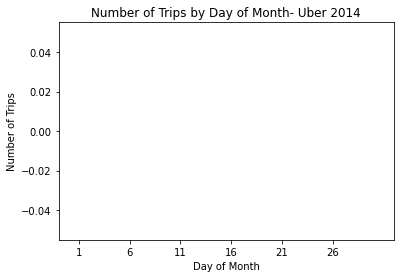

In [131]:
hist(data_group_day,bins=30,rwidth=1,range=(0.5,30.5),color='cyan')
xticks(range(1,31,5))
xlabel('Day of Month')
ylabel('Number of Trips')
title('Number of Trips by Day of Month- Uber 2014')

Text(0.5, 1.0, 'Number of Trips by Day of Month- Uber 2014')

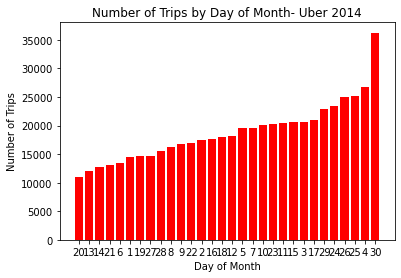

In [135]:
data_group_day_sorted=data_group_day.sort_values()
bar(range(1,31),data_group_day_sorted,color='red')
xticks(range(1,31),data_group_day_sorted.index);
xlabel('Day of Month')
ylabel('Number of Trips')
title('Number of Trips by Day of Month- Uber 2014')

Text(0.5, 1.0, 'Number of Trips by Day of Week- Uber 2014')

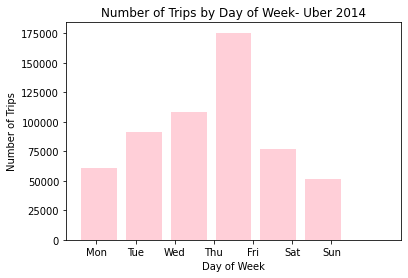

In [140]:
hist(data["Weekday"],bins=7,range=(-0.5,7.5),rwidth=0.8,color='pink',alpha=0.75)
xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split());
xlabel('Day of Week')
ylabel('Number of Trips')
title('Number of Trips by Day of Week- Uber 2014')


## Cross analysis of multiple fields

In [164]:
#group the data by hour and week day#
data_weekday_hour=data.groupby(["Hour","Weekday"]).apply(lambda rows : len(rows)).unstack()
data_weekday_hour


Weekday,0,1,2,3,4,5,6
Hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


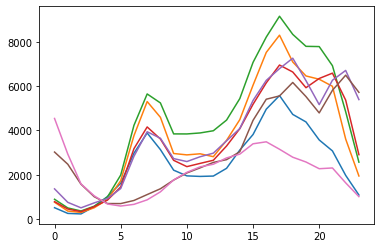

In [168]:
plot(data_weekday_hour);

<AxesSubplot:xlabel='Weekday', ylabel='Hour'>

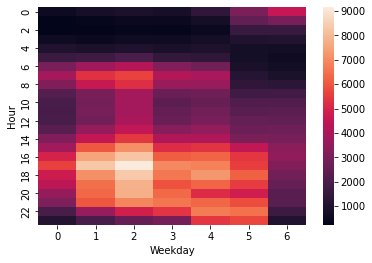

In [165]:
sn.heatmap(data_weekday_hour)


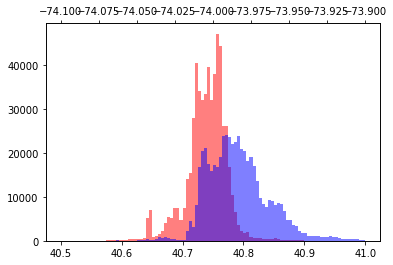

In [181]:
hist(data["Lat"],bins=100,range=(40.5,41),color='red',alpha=0.5,label='latitude')
twiny()
hist(data["Lon"],bins=100,range=(-74.1,-73.9),color='blue',alpha=0.5,label='longitude');

(40.7, 41.0)

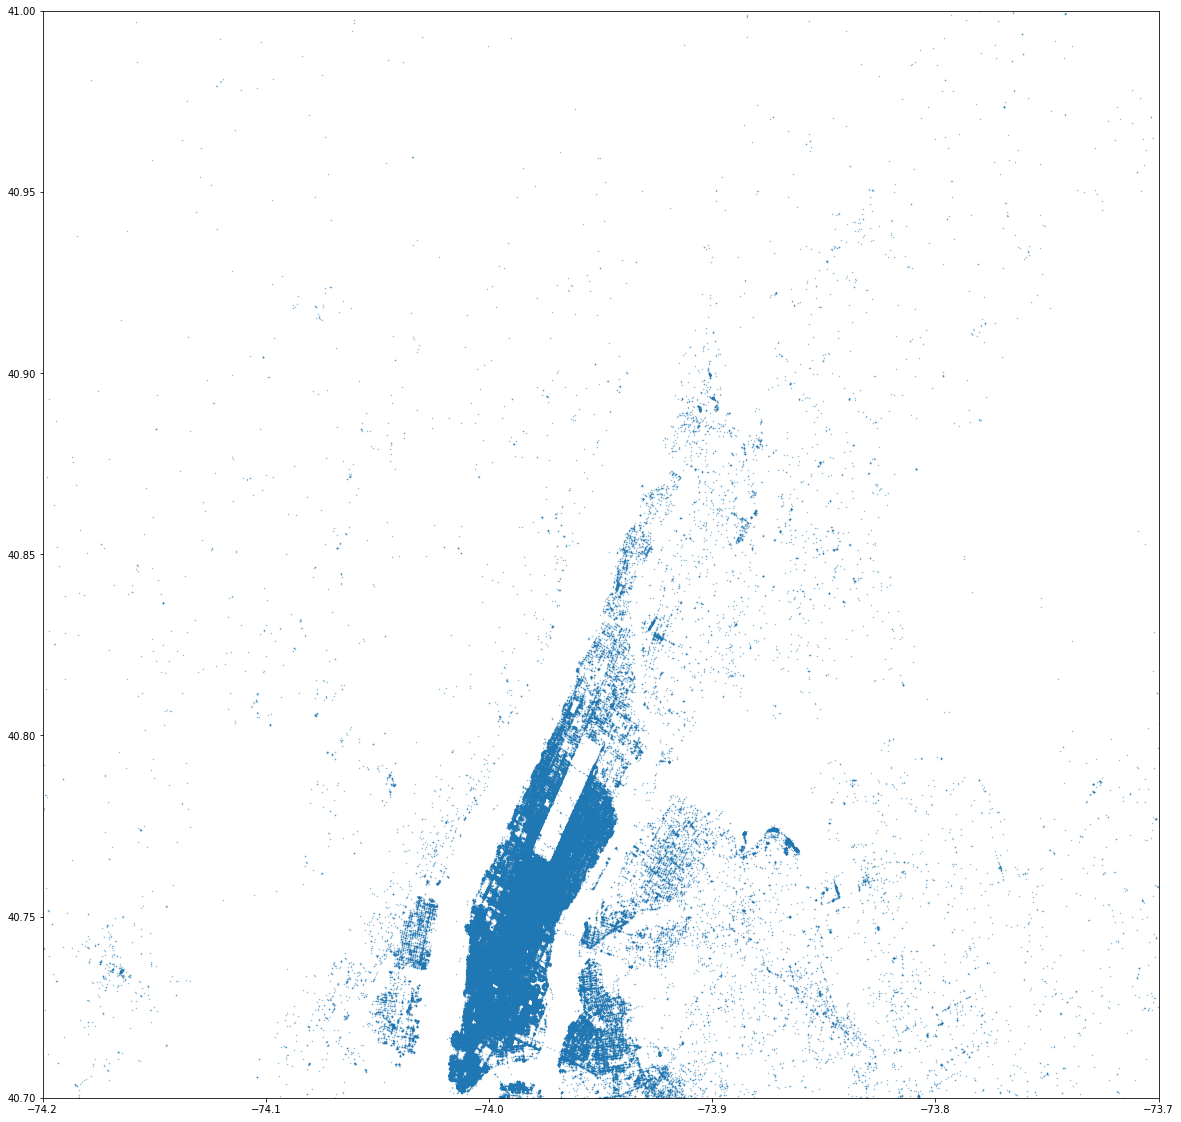

In [199]:
figure(figsize=(20,20))
plot(data["Lon"],data["Lat"],'.',ms=1,alpha=0.5)
xlim(-74.2,-73.7)
ylim(40.7,41)